Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


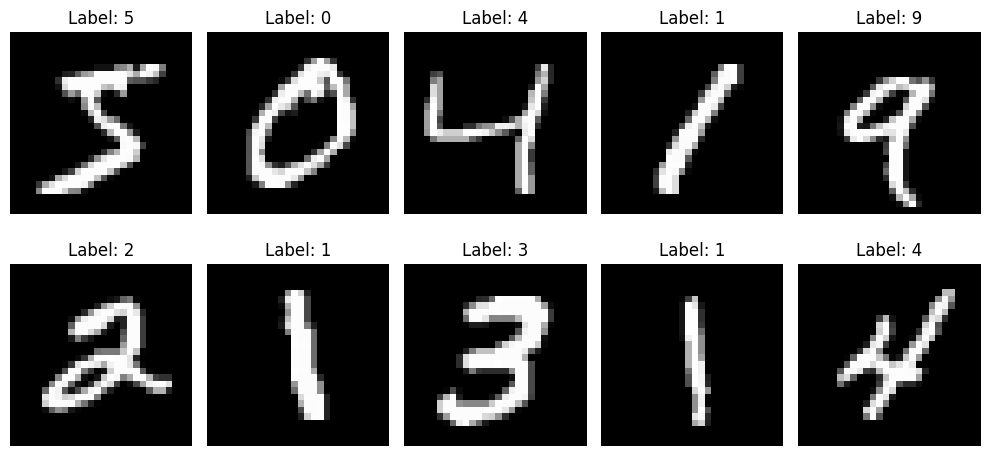

Reshaped training data: (60000, 28, 28, 1)
One-hot labels shape: (60000, 10)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.8864 - loss: 0.3745 - val_accuracy: 0.9792 - val_loss: 0.0811
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9661 - loss: 0.1123 - val_accuracy: 0.9858 - val_loss: 0.0572
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 53s 79ms/step - accuracy: 0.9746 - loss: 0.0843 - val_accuracy: 0.9882 - val_loss: 0.0461
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9785 - loss: 0.0700 - val_accuracy: 0.9895 - val_loss: 0.0410
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 74s 128ms/step - accuracy: 0.9811 - loss: 0.0626 - val_accuracy: 0.9887 - val_loss: 0.0396
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 47ms/step - accuracy: 0.9826 - loss: 0.0562 - val_accuracy: 0.9895 - val_loss: 0.0365
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9843 - loss: 0.0511 - val_accuracy: 0.9910 - val_loss: 0.0338
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9854 - loss: 0.0471 -

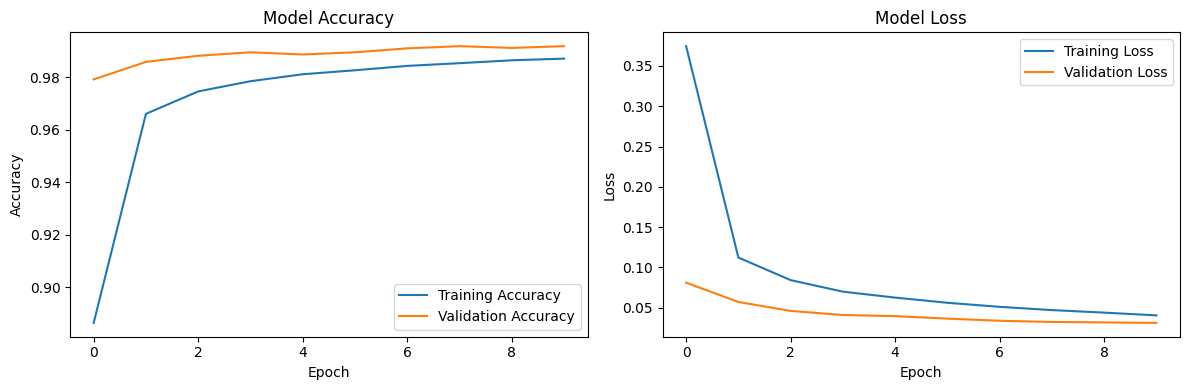

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


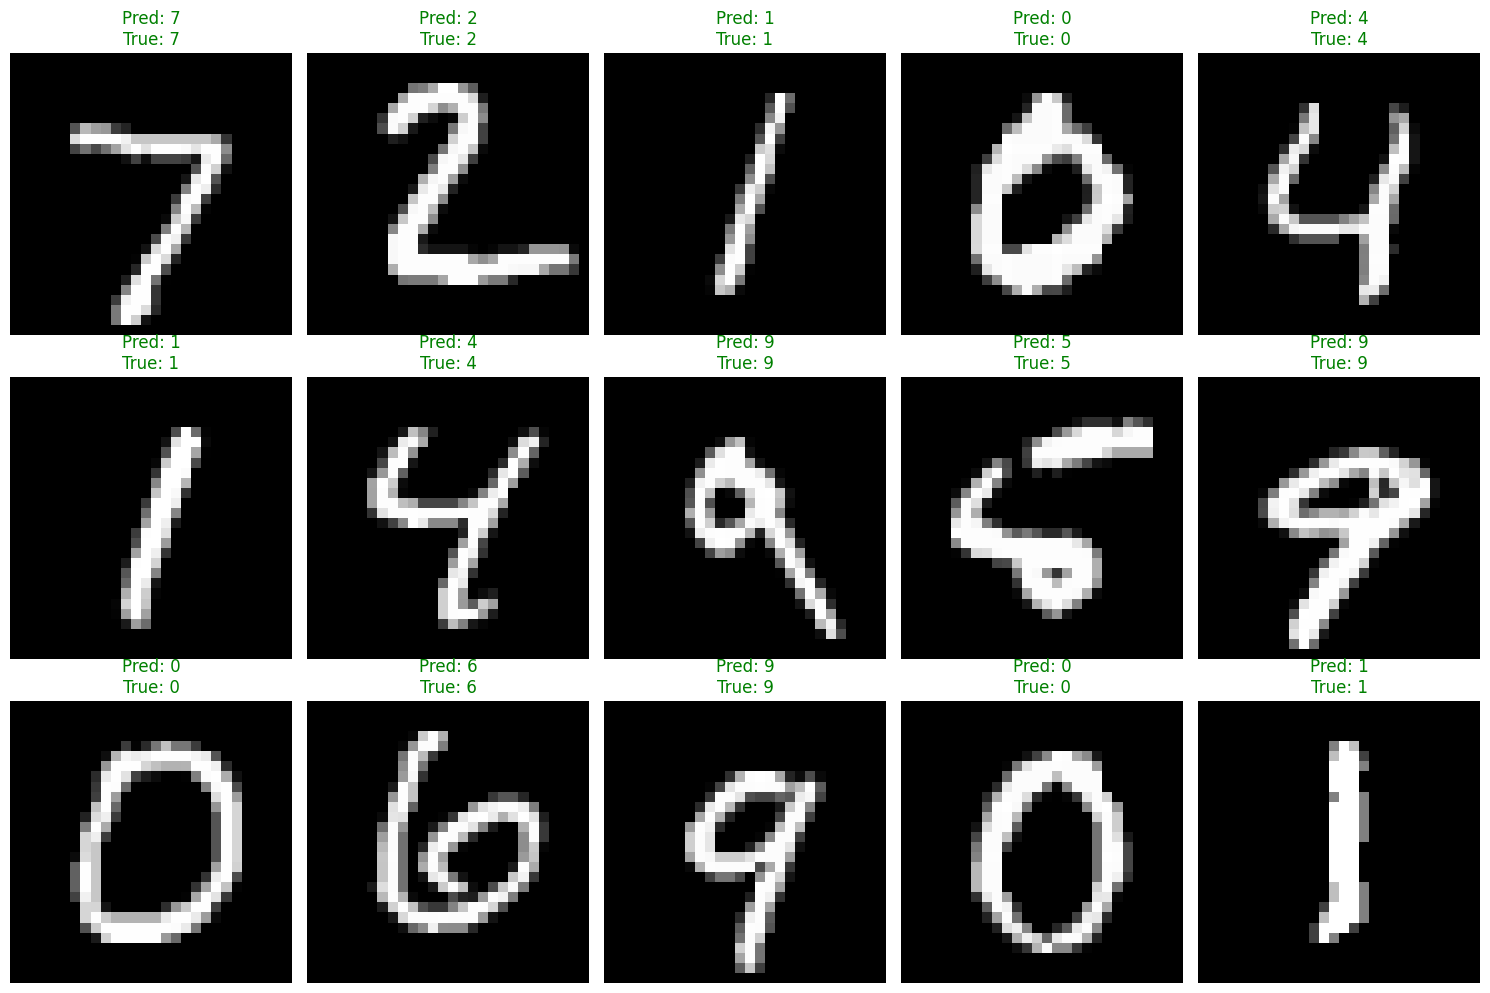

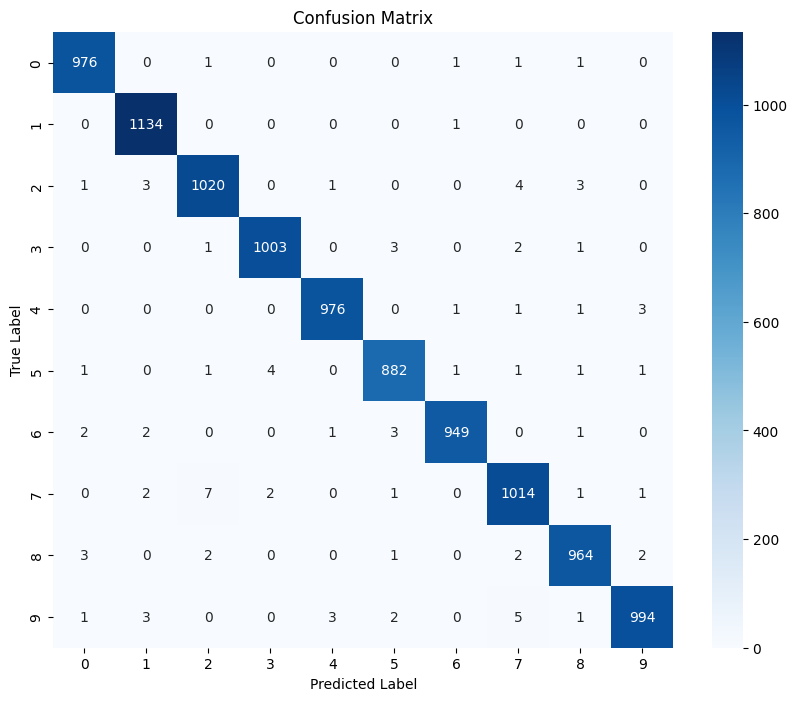

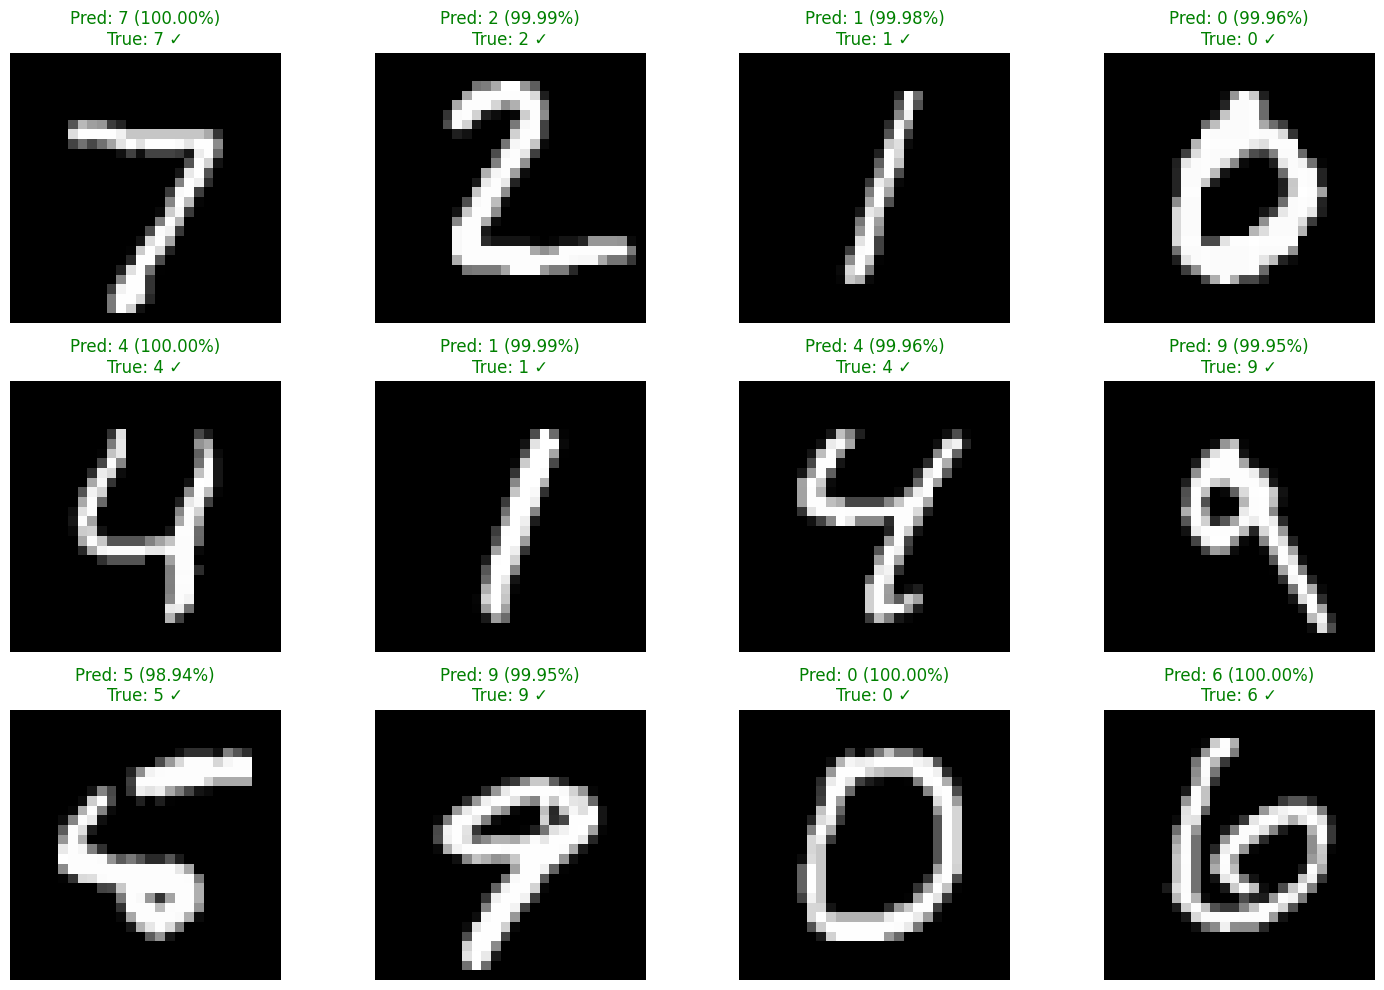

In [20]:
# handwriting_recognition_beginner.ipynb

# %% [markdown]
# # Handwritten Digit Recognition - Beginner Version
# ## Using MNIST Dataset with Neural Network

# %% [markdown]
# ### Step 1: Import Required Libraries

# %%
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# %% [markdown]
# ### Step 2: Load and Prepare MNIST Dataset

# %%
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# %% [markdown]
# ### Step 3: Visualize Some Training Examples

# %%
# Display first 10 training images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# %% [markdown]
# ### Step 4: Preprocess Data

# %%
# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Reshape images to add channel dimension (for CNN)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert labels to one-hot encoding
num_classes = 10
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes)

print(f"Reshaped training data: {x_train.shape}")
print(f"One-hot labels shape: {y_train_encoded.shape}")

# %% [markdown]
# ### Step 5: Create Neural Network Model

# %%
def create_model():
    model = keras.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ])
    
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

model = create_model()
model.summary()

# %% [markdown]
# ### Step 6: Train the Model

# %%
batch_size = 128
epochs = 10

history = model.fit(
    x_train, y_train_encoded,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    verbose=1
)

# %% [markdown]
# ### Step 7: Evaluate Model Performance

# %%
# Evaluate on test data
score = model.evaluate(x_test, y_test_encoded, verbose=0)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

# %% [markdown]
# ### Step 8: Make Predictions and Visualize Results

# %%
# Make predictions on test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize predictions vs actual labels
plt.figure(figsize=(15, 10))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    
    # Check if prediction is correct
    if predicted_labels[i] == y_test[i]:
        color = 'green'
    else:
        color = 'red'
    
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

# %% [markdown]
# ### Step 9: Create Confusion Matrix

# %%
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# %% [markdown]
# ### Step 10: Display Model Predictions with Confidence

# %%
# Show predictions with confidence scores
plt.figure(figsize=(15, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    
    # Get confidence scores
    confidence = predictions[i]
    predicted_digit = predicted_labels[i]
    confidence_score = confidence[predicted_digit]
    
    # Check if prediction is correct
    if predicted_digit == y_test[i]:
        color = 'green'
        result = "✓"
    else:
        color = 'red'
        result = "✗"
    
    plt.title(f"Pred: {predicted_digit} ({confidence_score:.2%})\nTrue: {y_test[i]} {result}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()